In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [3]:
df = pd.read_csv("exchange-rates_zaf.csv")

In [12]:
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Value"] = pd.to_numeric(df["Value"], errors="coerce")
df = df.dropna(subset=["Year", "Value"])

In [13]:
df_grouped = df.groupby("Year", as_index=False)["Value"].mean()
df_filtered = df_grouped[(df_grouped["Year"] >= 2014) & (df_grouped["Year"] <= 2023)]
print(df_filtered)

      Year      Value
44  2014.0  10.852656
45  2015.0  12.758931
46  2016.0  14.709611
47  2017.0  13.324514
48  2018.0  13.234425
49  2019.0  14.448427
50  2020.0  16.459105
51  2021.0  14.778678
52  2022.0  16.355853
53  2023.0  18.450698


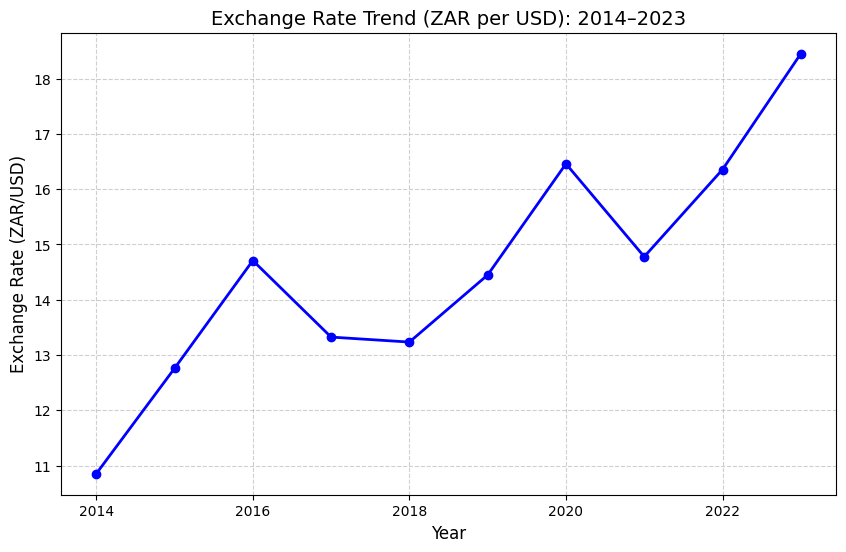

In [14]:
plt.figure(figsize=(10,6))
plt.plot(df_filtered["Year"], df_filtered["Value"], color='blue', marker='o', linewidth=2)
plt.title("Exchange Rate Trend (ZAR per USD): 2014–2023", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Exchange Rate (ZAR/USD)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

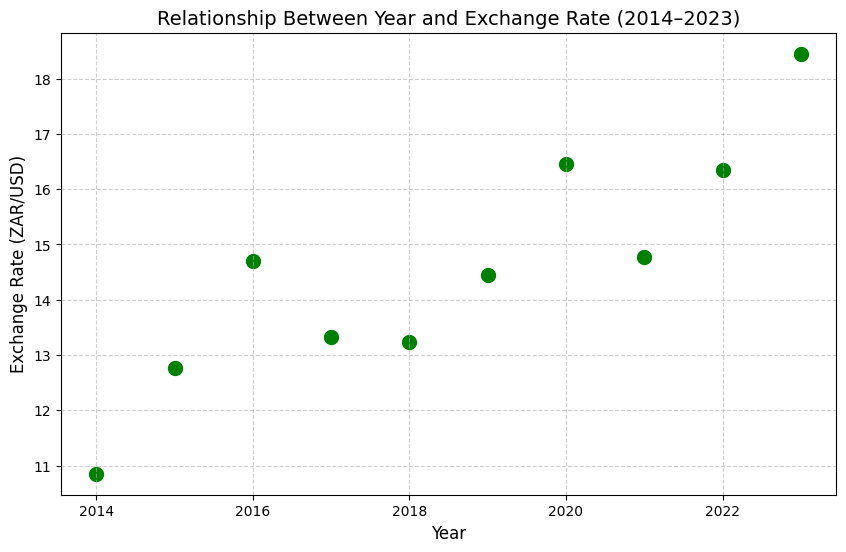

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(df_filtered["Year"], df_filtered["Value"], color='green', s=100)
plt.title("Relationship Between Year and Exchange Rate (2014–2023)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Exchange Rate (ZAR/USD)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

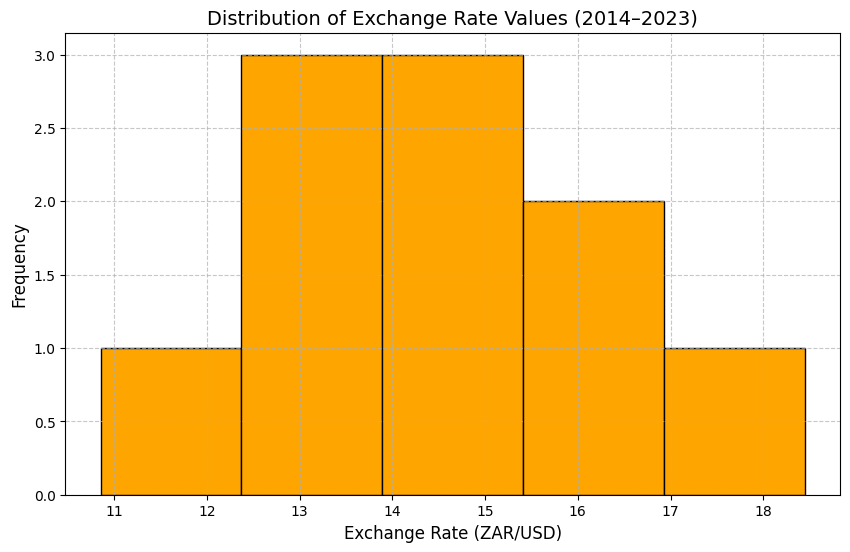

In [16]:
plt.figure(figsize=(10,6))
plt.hist(df_filtered["Value"], bins=5, color='orange', edgecolor='black')
plt.title("Distribution of Exchange Rate Values (2014–2023)", fontsize=14)
plt.xlabel("Exchange Rate (ZAR/USD)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


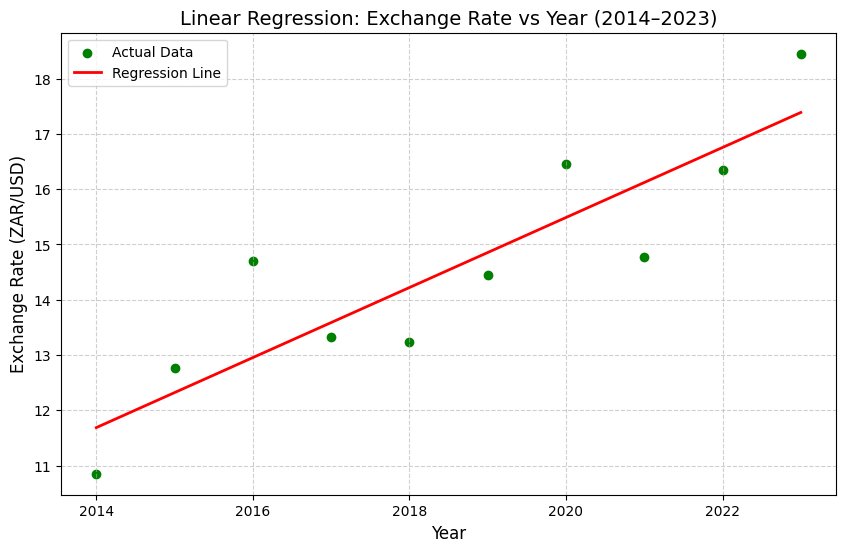

Regression Equation: Exchange Rate = 0.633*Year + -1264.139


In [17]:
X = df_filtered["Year"].values.reshape(-1, 1)
y = df_filtered["Value"].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(10,6))
plt.scatter(X, y, color='green', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line', linewidth=2)
plt.title("Linear Regression: Exchange Rate vs Year (2014–2023)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Exchange Rate (ZAR/USD)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print(f"Regression Equation: Exchange Rate = {model.coef_[0]:.3f}*Year + {model.intercept_:.3f}")
